In [8]:
import subprocess
import os
print('Current conda environment:', os.environ['CONDA_DEFAULT_ENV'])
os.environ['TOKENIZERS_PARALLELISM'] = "false"

cwd = os.getcwd()
print(cwd)

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(42)

Current conda environment: reinvent
/home/fts_g_ucla_edu/Projects/rips-relay/experiments


In [9]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

from rdkit import Chem

import prolif as plf

In [10]:
pdb = '5s18'

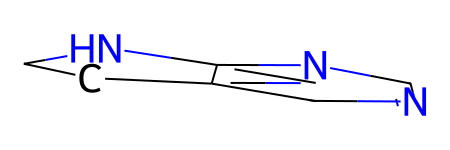

In [11]:
initial_mol = Chem.MolFromMolFile(f"data/docking/{pdb}_ligand.sdf")
initial = Chem.MolToSmiles(initial_mol)

initial_mol

In [12]:
initial

'c1ncc2c(n1)NCC2'

In [ ]:
arg1 = '--input_frag'
arg2 = '--remove_odd_rings'
arg3 = '--model'
arg4 = '--dock'
arg5 = '--pdb'

model = 'reinvent'

args = ['python3', 'generate_analogs.py',
        arg1, initial,
        arg2, 'False',
        arg3, model,
        arg4,
        arg5, pdb]

# Change directory to generate analogs with python script
%cd ..

subprocess.run(args,
               stdout=subprocess.DEVNULL,
               stderr=subprocess.STDOUT)
        
# Change directory back to that of the current notebook
%cd experiments

In [60]:
df = pd.read_csv('data/interaction_fingerprint.csv', header=[0, 1], index_col=0)

In [61]:
df

protein        ALA21.A    ASP22.A     ILE23.A                        \
interaction VdWContact VdWContact Hydrophobic HBAcceptor VdWContact   
Frame                                                                 
0                False       True        True       True       True   
1                False       True        True       True       True   
2                False       True        True       True       True   
3                False       True        True       True       True   
4                False       True        True       True       True   
...                ...        ...         ...        ...        ...   
61               False       True        True       True       True   
62               False       True        True       True       True   
63               False       True        True       True       True   
64               False       True        True       True       True   
65               False      False        True       True       True   

protein         ALA38.A    GLY48.A     VAL49.A                ALA52.A  ...  \
interaction Hydrophobic VdWContact Hydrophobic VdWContact Hydrophobic  ...   
Frame                                                                  ...   
0                 False      False        True       True       False  ...   
1                 False      False        True       True       False  ...   
2                  True      False        True       True       False  ...   
3                 False      False        True      False       False  ...   
4                 False      False        True       True        True  ...   
...                 ...        ...         ...        ...         ...  ...   
61                False      False        True       True       False  ...   
62                False      False        True       True       False  ...   
63                False      False        True       True       False  ...   
64                False      False        True      False        True  ...   
65                False      False        True       True       False  ...   

protein       HOH425.A   HOH427.A              HOH460.A   HOH471.A   HOH477.A  \
interaction VdWContact HBAcceptor VdWContact VdWContact VdWContact VdWContact   
Frame                                                                           
0                 True      False       True       True       True       True   
1                 True      False      False       True       True       True   
2                False      False       True      False       True      False   
3                 True      False       True       True       True       True   
4                False      False      False      False      False      False   
...                ...        ...        ...        ...        ...        ...   
61               False      False      False      False      False      False   
62               False      False      False      False      False      False   
63               False      False      False      False      False      False   
64               False      False      False      False      False      False   
65               False      False      False      False      False      False   

protein       HOH486.A              HOH489.A   HOH495.A  
interaction HBAcceptor VdWContact VdWContact VdWContact  
Frame                                                    
0                False      False       True       True  
1                False      False       True       True  
2                False      False      False       True  
3                False      False       True       True  
4                False      False      False      False  
...                ...        ...        ...        ...  
61               False      False      False      False  
62               False      False      False      False  
63                True       True      False      False  
64               False      False      False      False  
65               False 

Text(0.5, 54.249999999999986, 'Protein Interaction')

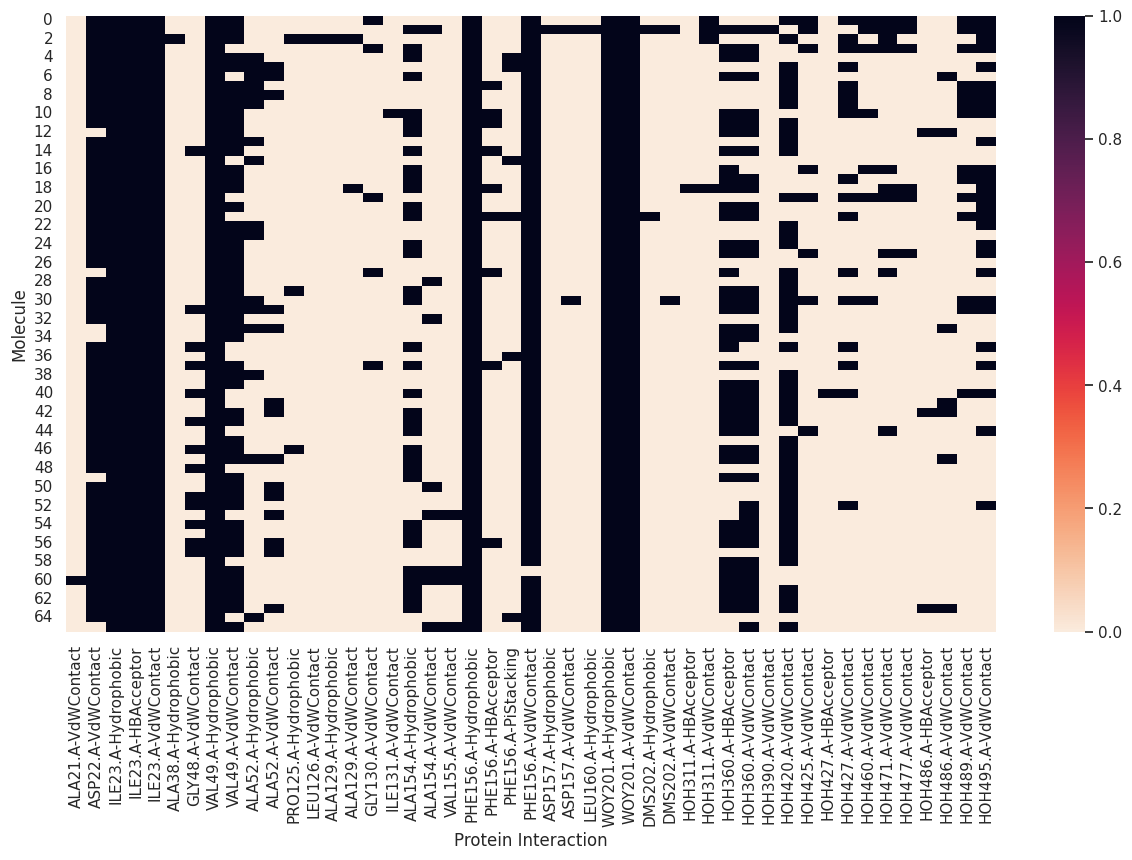

In [62]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(df,cmap=sns.cm.rocket_r)
ax.set_ylabel("Molecule")
ax.set_xlabel("Protein Interaction")

In [65]:
PDB_FILEPATH = "data/docking/5s18_protein.pdb"
SDF_FILEPATH = "data/docking/analogs_rmsd_ok.sdf"

In [66]:
fp = plf.Fingerprint()

mol = Chem.MolFromPDBFile(PDB_FILEPATH, removeHs=False)
prot = plf.Molecule(mol)
suppl = plf.sdf_supplier(SDF_FILEPATH)
fp.run_from_iterable(suppl,prot,progress=True)
df = fp.to_dataframe()
df.columns = df.columns.droplevel(0)
df

  0%|          | 0/66 [00:00<?, ?it/s]

protein        ALA21.A    ASP22.A     ILE23.A                        \
interaction VdWContact VdWContact Hydrophobic HBAcceptor VdWContact   
Frame                                                                 
0                False       True        True       True       True   
1                False       True        True       True       True   
2                False       True        True       True       True   
3                False       True        True       True       True   
4                False       True        True       True       True   
...                ...        ...         ...        ...        ...   
61               False       True        True       True       True   
62               False       True        True       True       True   
63               False       True        True       True       True   
64               False       True        True       True       True   
65               False      False        True       True       True   

protein         ALA38.A    GLY48.A     VAL49.A                ALA52.A  ...  \
interaction Hydrophobic VdWContact Hydrophobic VdWContact Hydrophobic  ...   
Frame                                                                  ...   
0                 False      False        True       True       False  ...   
1                 False      False        True       True       False  ...   
2                  True      False        True       True       False  ...   
3                 False      False        True      False       False  ...   
4                 False      False        True       True        True  ...   
...                 ...        ...         ...        ...         ...  ...   
61                False      False        True       True       False  ...   
62                False      False        True       True       False  ...   
63                False      False        True       True       False  ...   
64                False      False        True      False        True  ...   
65                False      False        True       True       False  ...   

protein       VAL155.A    PHE156.A                                   \
interaction VdWContact Hydrophobic HBAcceptor PiStacking VdWContact   
Frame                                                                 
0                False        True      False      False       True   
1                False        True      False      False       True   
2                False        True      False      False       True   
3                False        True      False      False       True   
4                False        True      False       True       True   
...                ...         ...        ...        ...        ...   
61               False        True      False      False       True   
62               False        True      False      False       True   
63               False        True      False      False       True   
64               False        True      False       True       True   
65                True        True      False      False       True   

protein        ASP157.A               LEU160.A    DMS202.A             
interaction Hydrophobic VdWContact Hydrophobic Hydrophobic VdWContact  
Frame                                                                  
0                 False      False       False       False      False  
1                  True       True        True        True       True  
2                 False      False       False       False      False  
3                 False      False       False       False      False  
4                 False      False       False       False      False  
...                 ...        ...         ...         ...        ...  
61                False      False       False       False      False  
62                False      False       False       False      False  
63                False      False       False       False      False  
64                False      False       False       

Text(0.5, 54.249999999999986, 'Protein Interaction')

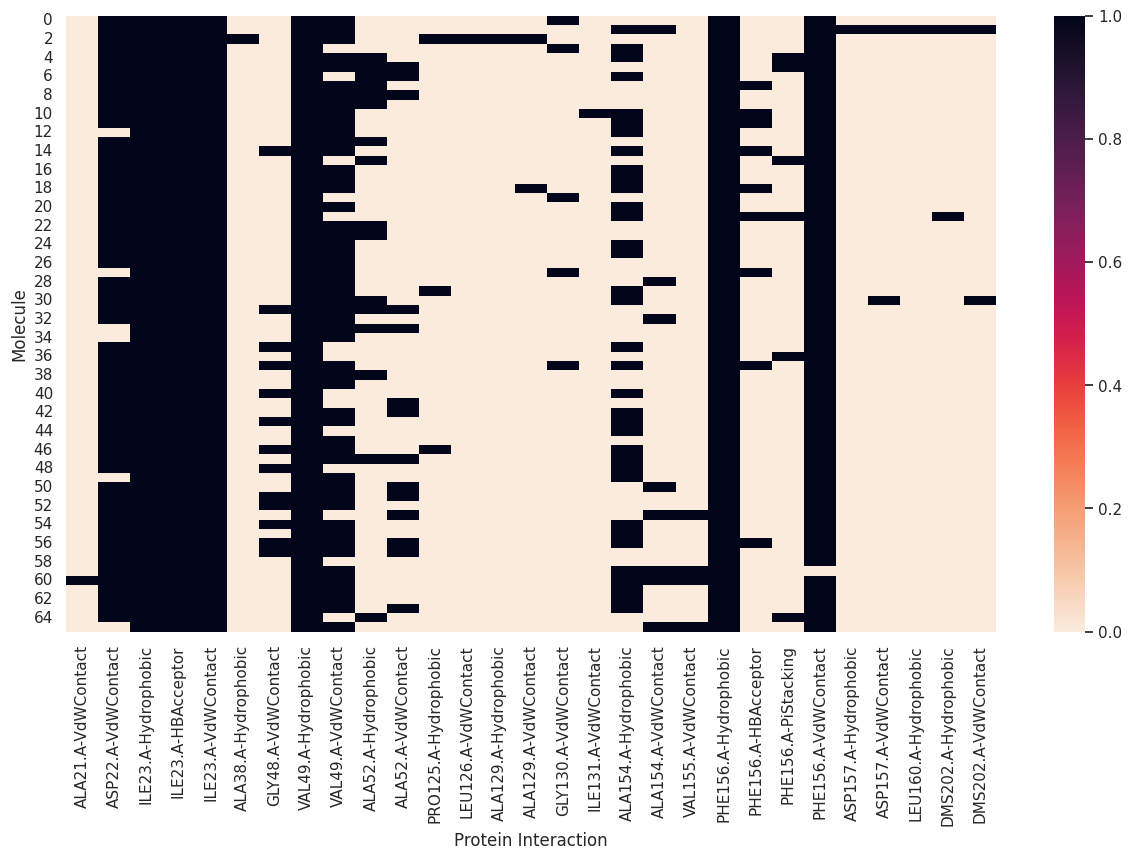

In [67]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(df, cmap=sns.cm.rocket_r)
ax.set_ylabel("Molecule")
ax.set_xlabel("Protein Interaction")